# generate feature list
```
python3 gen_feat.py --inf_list toy_imgs/img.list --feat_list toy_imgs/feat.list --resume magface_epoch_00025.pth
```

In [87]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="white") 
%matplotlib inline

# Visualize magnitudes (qualities)

In [170]:
def imshow(img):
    plt.imshow(img)
def show(idx_):
    imgname = imgnames[idx_]
    img = cv2.imread(imgname)
    imshow(img)
    print(img_2_mag[imgname], imgname)    

In [4]:
with open('toy_imgs/feat.list', 'r') as f:
    lines = f.readlines()

FileNotFoundError: [Errno 2] No such file or directory: 'db_files/data_not_normalized.csv'

In [192]:
data = pd.read_csv("/home/chaki/Projects/MagFace/db_files/data_not_normalized.csv")


In [193]:
img_2_feats = {}
img_2_mag = {}
for idx, row in data.iterrows():
    imgname = "/home/chaki/Projects/MagFace/" + row["path"]
    feats = eval(row["feature_512"]) #[float(e) for e in parts[1:]]
    mag = np.linalg.norm(feats)
    img_2_feats[imgname] = feats/mag
    img_2_mag[imgname] = mag


In [194]:
imgnames = list(img_2_mag.keys())
mags = [img_2_mag[imgname] for imgname in imgnames]
sort_idx = np.argsort(mags)

In [195]:
sort_idx.shape

(23,)

In [188]:
'/'.join(imgnames[3].split('/')[-2:])


'person_10/6313.jpg'

In [196]:
from pathlib import Path
path = Path(imgnames[0]).parent
save_path = str(path / "result.jpg")

In [197]:
H, W = 112, 112
NH, NW = 4, 10
canvas = np.zeros((NH * H, NW * W, 3), np.uint8)

for i, ele in enumerate(sort_idx):
    imgname = imgnames[ele]#'/'.join(imgnames[ele].split('/')[-2:])
    img = cv2.imread(imgname)
    img = cv2.resize(img, (112,112))
    canvas[int(i / NW) * H: (int(i / NW) + 1) * H, (i % NW) * W: ((i % NW) + 1) * W, :] = img    

[13.1, 13.41, 14.2, 14.36, 14.66, 14.95, 15.06, 15.21, 15.27, 15.28, 15.52, 15.61, 15.75, 15.75, 16.12, 16.23, 16.46, 16.48, 16.61, 16.67, 16.71, 16.97, 17.02]


True

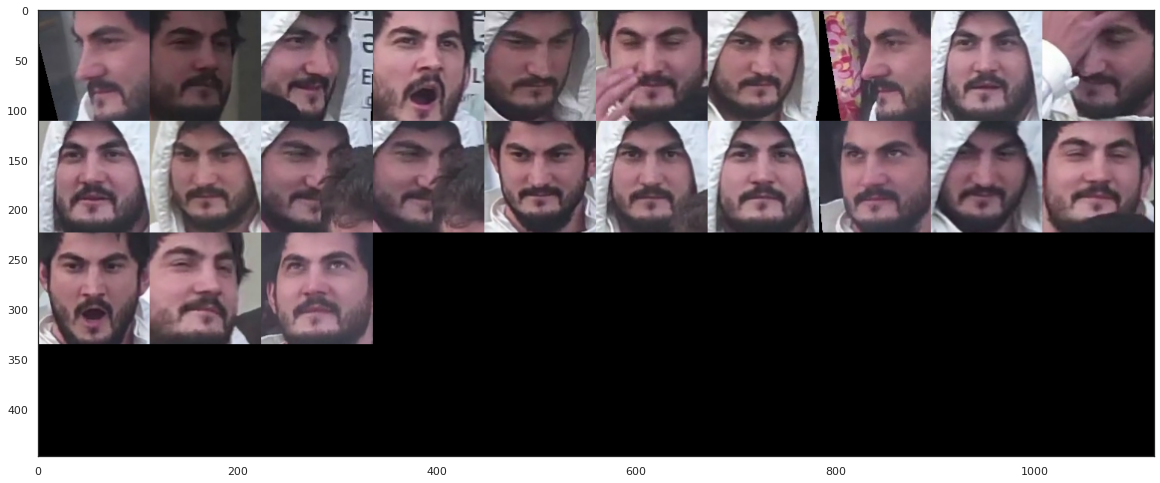

In [198]:
plt.figure(figsize=(20, 20))
print([float('{0:.2f}'.format(mags[idx_])) for idx_ in sort_idx])
imshow(canvas)
cv2.imwrite(save_path, canvas)


True

# visualize recognition

In [61]:
feats = np.array([img_2_feats[imgnames[ele]] for ele in sort_idx])
sim_mat = np.dot(feats, feats.T)

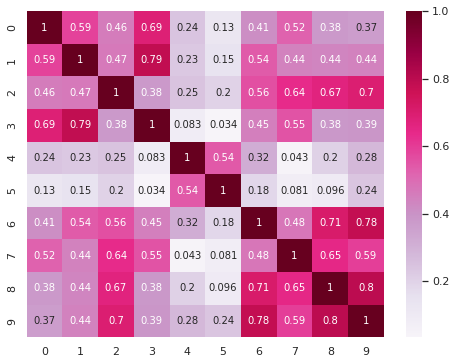

In [62]:
fig, ax = plt.subplots(figsize=(8, 6))  
ax = sns.heatmap(sim_mat, cmap="PuRd", annot=True)